In [ ]:
import pandas as pd
import numpy as np

data=pd.read_excel("2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx")

In [ ]:
data.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42073 entries, 0 to 42072
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REG_DATE       42073 non-null  datetime64[ns]
 1   P_TYPE         42073 non-null  object        
 2   CTRY_1         42073 non-null  object        
 3   CTRY_2         42073 non-null  object        
 4   P_PURPOSE      42073 non-null  object        
 5   CATEGORY_1     42073 non-null  object        
 6   CATEGORY_2     42073 non-null  object        
 7   P_NAME         42073 non-null  object        
 8   P_IMPORT_TYPE  42073 non-null  object        
 9   P_PRICE        42073 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 3.2+ MB


In [ ]:
print(data.columns)

Index(['REG_DATE', 'P_TYPE', 'CTRY_1', 'CTRY_2', 'P_PURPOSE', 'CATEGORY_1',
       'CATEGORY_2', 'P_NAME', 'P_IMPORT_TYPE', 'P_PRICE'],
      dtype='object')


In [ ]:
cols=['P_TYPE', 'CTRY_1', 'CTRY_2', 'P_PURPOSE', 'CATEGORY_1',
       'CATEGORY_2', 'P_NAME', 'P_IMPORT_TYPE']
for col in cols:
    print(col)
    print(len( data[col].unique() ))
    print(data[col].unique())

P_TYPE
1
['수산물']
CTRY_1
87
['아르헨티나' '바레인' '칠레' '중국' '프랑스' '인도네시아' '일본' '대한민국' '모로코' '멕시코' '말레이시아'
 '노르웨이' '페루' '러시아' '시에라리온' '세네갈' '태국' '튀니지' '대만' '미국' '베트남' '남아프리카 공화국'
 '기니' '인도' '필리핀' '포르투갈' '사우디아라비아' '뉴질랜드' '파키스탄' '아랍에미리트' '캐나다' '에콰도르'
 '아일랜드' '터키' '스페인' '아이슬란드' '모리타니' '호주' '바누아투' '영국' '소말리아' '불가리아' '피지'
 '우크라이나' '리비아' '세이셸' '이탈리아' '키리바시' '기니비사우' '브라질' '스리랑카' '우루과이'
 '세인트빈센트 그레나딘' '에스토니아' '이란' '미얀마' '파푸아뉴기니' '가나' '방글라데시' '네덜란드' '파나마' '감비아'
 '크로아티아' '앙골라' '베네수엘라' '싱가포르' '포클랜드 제도' '모잠비크' '이집트' '수리남' '루마니아' '몰타'
 '라트비아' '나미비아' '오만' '그리스' '그린란드' '알제리' '니카라과' '쿡 제도' '팔라우' '쿠바' '라이베리아'
 '마다가스카르' '미크로네시아 연방' '사이프러스' '콜롬비아']
CTRY_2
88
['아르헨티나' '바레인' '칠레' '중국' '스페인' '프랑스' '인도네시아' '일본' '북한' '모로코' '멕시코' '말레이시아'
 '노르웨이' '페루' '러시아' '시에라리온' '세네갈' '태국' '튀니지' '벨리즈' '대만' '캐나다' '미국' '베트남'
 '남아프리카 공화국' '기니' '인도' '필리핀' '사우디아라비아' '뉴질랜드' '파키스탄' '아랍에미리트' '에콰도르'
 '네덜란드' '홍콩' '아일랜드' '터키' '아이슬란드' '모리타니' '세이셸' '영국' '오만' '호주' '불가리아' '독일'
 '키리바시' '기니비사우' '브라질' '스리랑카' '우루과이' '이란' '미얀마' '솔로몬 제도' '가나' '방글라데시' '파나

In [ ]:
data=data.drop(axis=1, columns=['P_TYPE'])
print(data.shape)
data.head()

(42073, 9)


,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [ ]:
print(data[data['CTRY_1']!=data['CTRY_2']])

print(len(data[data['CTRY_1']!=data['CTRY_2']]))

#제조국 == 수출국인 행 -> 0
#제조국 != 수출국인 행 -> 1

        REG_DATE CTRY_1 CTRY_2  ...   P_NAME P_IMPORT_TYPE    P_PRICE
17    2015-12-28    프랑스    스페인  ...  대서양참다랑어            냉장  28.868041
23    2015-12-28   대한민국     북한  ...       미역            염장   0.913119
39    2015-12-28     대만    벨리즈  ...       꽁치            냉동   0.956387
40    2015-12-28     대만     일본  ...     눈다랑어   냉동,필렛(F),횟감  12.799577
41    2015-12-28     대만     일본  ...     눈다랑어      냉동,목살,횟감   3.628571
...          ...    ...    ...  ...      ...           ...        ...
42006 2019-12-30   에콰도르  베네수엘라  ...       갈치            냉동   1.774222
42009 2019-12-30    러시아     중국  ...       명태            냉동   5.051081
42030 2019-12-30    러시아     중국  ...    각시가자미            냉동   2.263721
42040 2019-12-30    러시아     중국  ...       명태      냉동,필렛(F)   3.226426
42059 2019-12-30     중국     홍콩  ...       부세            냉동   4.218076

[4439 rows x 9 columns]
4439


In [ ]:
temp=data['REG_DATE'].iloc[1]
temp=str(temp)
temp=temp.split(' ')[0]
temp=temp.split('-')
# print(temp)
print(temp[0],"/",temp[1],"/",temp[2],"/")

2015 / 12 / 28 /


In [ ]:
data['Year']=0
data['Month']=0
data['Date']=0

for i in range(len(data)):
    temp=str(data['REG_DATE'].iloc[i])
    temp=temp.split(' ')[0]
    temp=temp.split('-')
    data['Year'].iloc[i]=temp[0]
    data['Month'].iloc[i]=temp[1]
    data['Date'].iloc[i]=temp[2]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['CATEGORY_1']=le.fit_transform(data['CATEGORY_1'].values)
data['CATEGORY_2']=le.fit_transform(data['CATEGORY_2'].values)
data['CTRY_1']=le.fit_transform(data['CTRY_1'].values)
data['CTRY_2']=le.fit_transform(data['CTRY_2'].values)
data['P_NAME']=le.fit_transform(data['P_NAME'].values)
data['P_IMPORT_TYPE']=le.fit_transform(data['P_IMPORT_TYPE'].values)
data['P_PURPOSE']=le.fit_transform(data['P_PURPOSE'].values)

In [ ]:
data.head()

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,Year,Month,Date
0,2015-12-28,48,49,3,0,59,172,8,7.480000,2015,12,28
1,2015-12-28,30,29,3,0,10,48,8,2.920000,2015,12,28
2,2015-12-28,30,29,3,0,10,48,51,3.356352,2015,12,28
3,2015-12-28,66,66,3,6,105,265,4,18.260870,2015,12,28
4,2015-12-28,65,64,3,3,61,158,8,4.791340,2015,12,28


In [ ]:
y=data['P_PRICE']
data=data.drop(axis=1,columns=['REG_DATE','P_PRICE'])
data.head(5)

,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,Year,Month,Date
0,48,49,3,0,59,172,8,2015,12,28
1,30,29,3,0,10,48,8,2015,12,28
2,30,29,3,0,10,48,51,2015,12,28
3,66,66,3,6,105,265,4,2015,12,28
4,65,64,3,3,61,158,8,2015,12,28


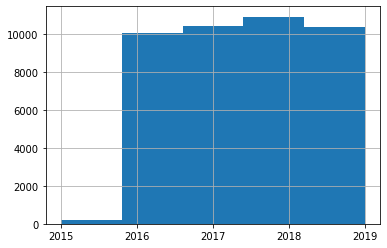

In [ ]:
data['Year'].hist(bins=5)

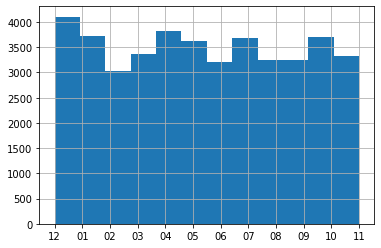

In [ ]:
data['Month'].hist(bins=12)

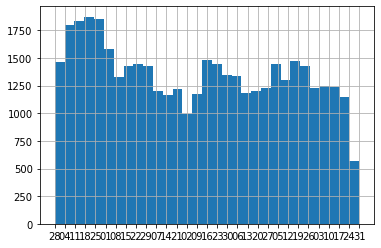

In [ ]:
data['Date'].hist(bins=31)

---

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.15, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
clf.score(x_train,y_train)

0.04999585641431381

In [ ]:
clf.score(x_test,y_test)

0.0694376623436731